In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [156]:
df = pd.read_csv("Clustering.csv")
df.head()

,Feature1,Feature2
0,2.248357,1.930868
1,2.323844,2.761515
2,1.882923,1.882932
3,2.789606,2.383717
4,1.765263,2.271280


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  150 non-null    float64
 1   Feature2  150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [158]:
np.random.seed(42)
outlier_num = 10
outliers = np.random.uniform(
    low=df.min().min() - 10, high=df.max().max() + 10, size=(outlier_num, df.shape[1])
)

df = pd.concat([df, pd.DataFrame(outliers, columns=df.columns)], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  160 non-null    float64
 1   Feature2  160 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [159]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(scaled_data)

df["Cluster"] = kmedoids.labels_
medoids = kmedoids.cluster_centers_

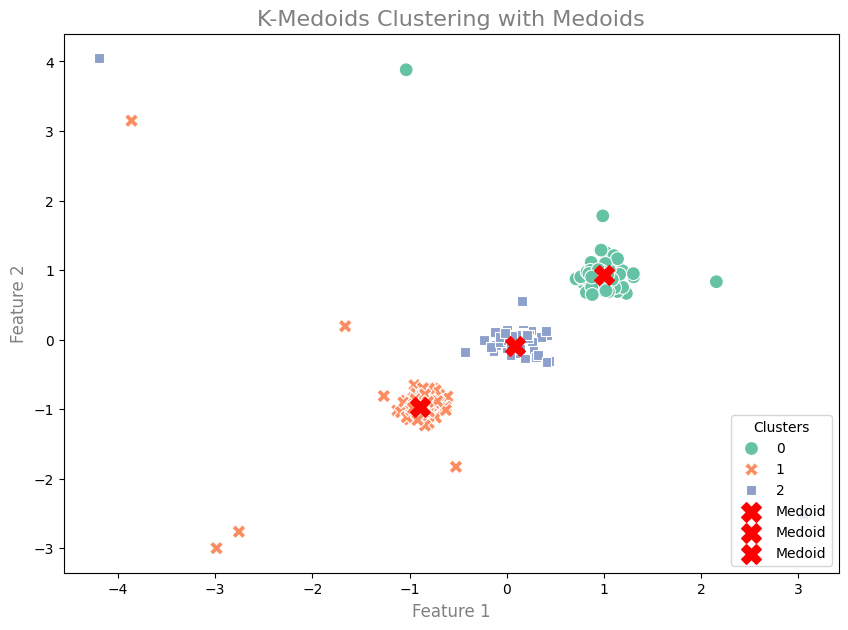

In [160]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=df["Cluster"],
    palette="Set2",
    style=df["Cluster"],
    s=100,
)

for medoid in medoids:
    plt.scatter(medoid[0], medoid[1], c="red", marker="X", s=200, label="Medoid")

plt.title(
    "K-Medoids Clustering with Medoids", fontsize=16, fontweight="light", color="grey"
)
plt.xlabel("Feature 1", fontsize=12, color="grey")
plt.ylabel("Feature 2", fontsize=12, color="grey")
plt.legend(title="Clusters", loc="lower right", frameon=True, fontsize=10)
plt.show()

In [161]:
score = silhouette_score(scaled_data, kmedoids.labels_)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.67


In [162]:
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=["Cluster"], errors="ignore"))

sil_scores = []

for k in range(2, 5):  # k = 2, 3, 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    labels = kmeans.labels_

    score = silhouette_score(scaled_data, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.2f}")

optimal_k = range(2, 5)[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters: {optimal_k}")

Silhouette Score for k=2: 0.56
Silhouette Score for k=3: 0.67
Silhouette Score for k=4: 0.72
Optimal number of clusters: 4


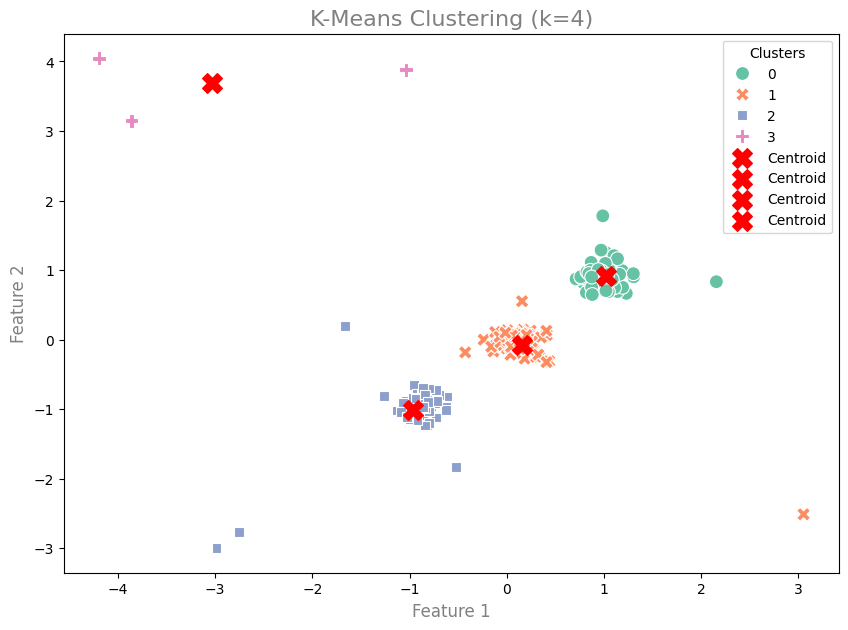

In [163]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(scaled_data)

df["Cluster"] = kmeans_optimal.labels_
centroids = kmeans_optimal.cluster_centers_

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=df["Cluster"],
    palette="Set2",
    style=df["Cluster"],
    s=100,
)

for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], c="red", marker="X", s=200, label="Centroid")

plt.title(
    f"K-Means Clustering (k={optimal_k})", fontsize=16, fontweight="light", color="grey"
)
plt.xlabel("Feature 1", fontsize=12, color="grey")
plt.ylabel("Feature 2", fontsize=12, color="grey")
plt.legend(title="Clusters", loc="upper right", frameon=True, fontsize=10)
plt.show()

In [164]:
optimal_score = silhouette_score(scaled_data, kmeans_optimal.labels_)
print(f"Silhouette Score for optimal k={optimal_k}: {optimal_score:.2f}")

Silhouette Score for optimal k=4: 0.72


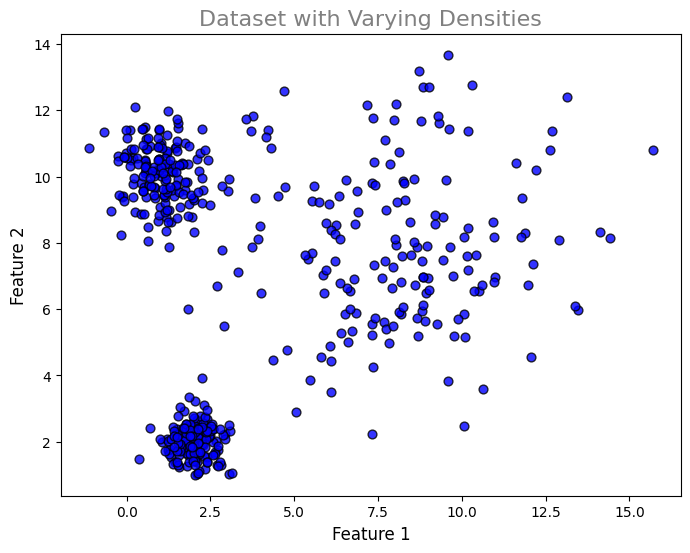

In [165]:
from sklearn.datasets import make_blobs

centers = [[2, 2], [8, 8], [1, 10]]
cluster_std = [0.5, 2.5, 0.8]

data, _ = make_blobs(
    n_samples=500, centers=centers, cluster_std=cluster_std, random_state=42
)
df = pd.DataFrame(data, columns=["Feature_1", "Feature_2"])

plt.figure(figsize=(8, 6))
plt.scatter(
    df["Feature_1"], df["Feature_2"], s=40, c="blue", alpha=0.8, edgecolor="black"
)
plt.title(
    "Dataset with Varying Densities", fontsize=16, fontweight="light", color="grey"
)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [166]:
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
df["Cluster_KMeans"] = kmeans.labels_

dbi_kmeans = davies_bouldin_score(df[["Feature_1", "Feature_2"]], kmeans.labels_)
print(f"Davies-Bouldin Index for K-Means: {dbi_kmeans:.2f}")

Davies-Bouldin Index for K-Means: 0.48


In [167]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(df[["Feature_1", "Feature_2"]])

df["Cluster_KMedoids"] = kmedoids.labels_

dbi_kmedoids = davies_bouldin_score(df[["Feature_1", "Feature_2"]], kmedoids.labels_)
print(f"Davies-Bouldin Index for K-Medoids: {dbi_kmedoids:.2f}")

Davies-Bouldin Index for K-Medoids: 0.48


In [168]:
if dbi_kmeans < dbi_kmedoids:
    print("K-Means performs better based on Davies-Bouldin Index.")
else:
    print("K-Medoids performs better based on Davies-Bouldin Index.")

K-Means performs better based on Davies-Bouldin Index.


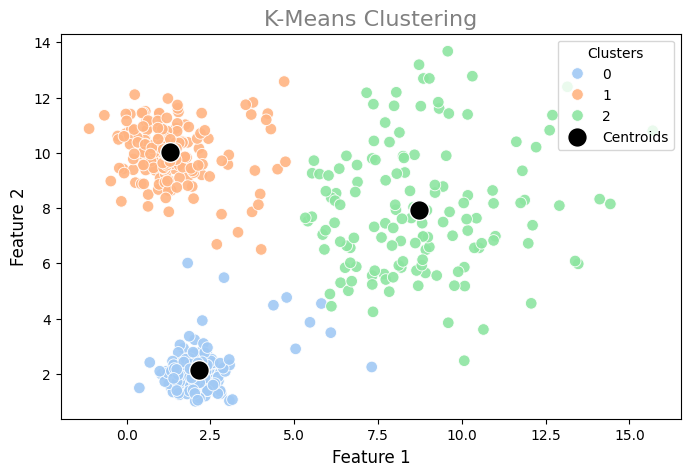

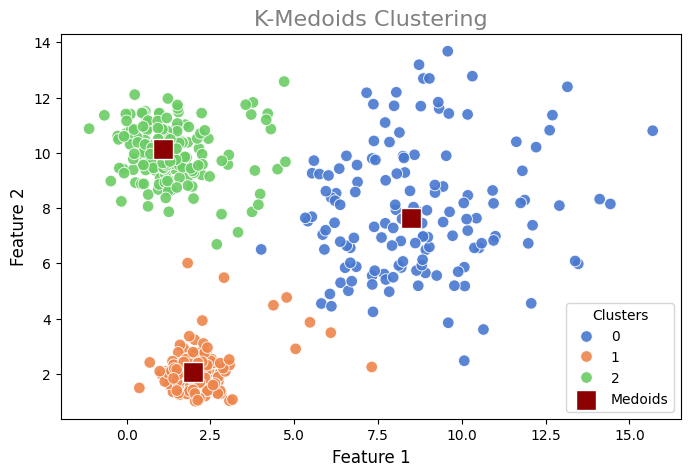

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="Feature_1",
    y="Feature_2",
    hue="Cluster_KMeans",
    data=df,
    palette="pastel",
    s=70,
    alpha=0.9,
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="black",
    marker="o",
    s=200,
    edgecolor="white",
    label="Centroids",
)
plt.title("K-Means Clustering", fontsize=16, fontweight="light", color="grey")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="Clusters", loc="upper right", frameon=True)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="Feature_1",
    y="Feature_2",
    hue="Cluster_KMedoids",
    data=df,
    palette="muted",
    s=70,
    alpha=0.9,
)
plt.scatter(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    c="darkred",
    marker="s",
    s=200,
    edgecolor="white",
    label="Medoids",
)
plt.title("K-Medoids Clustering", fontsize=16, fontweight="light", color="grey")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="Clusters", loc="lower right", frameon=True)
plt.show()